# A few hands-on exercises

In [8]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

## Chemical Kinetics (Working in 0D)

In [9]:
# Define the gas
gas = ct.Solution('h2o2.cti')
fuel_species="H2"
ox_species="O2"
phi=1
gas_0D.set_equivalence_ratio(phi,fuel_species,ox_species)
gas_0D.TP=1100, 101325

In [10]:
# Useful tools for setting up the gas
gas.TPX=2000, 101325,"H2:2, O2:1" #Set using molar string

#fuel_species="H2"
#ox_species="O2"
#phi=1
#gas_0D.set_equivalence_ratio(phi,fuel_species,ox_species)
#gas_0D.TP=1100, 101325

# Check the state of the gas
gas()


  ohmech:

       temperature            2000  K
          pressure          101325  Pa
           density       0.0731817  kg/m^3
  mean mol. weight         12.0102  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      4.5819e+06        5.503e+07     J
   internal energy      3.1973e+06         3.84e+07     J
           entropy           18359        2.205e+05     J/K
    Gibbs function     -3.2137e+07        -3.86e+08     J
 heat capacity c_p          2950.6        3.544e+04     J/K
 heat capacity c_v          2258.3        2.712e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2       0.666667         0.111898         -19.8845
                O2       0.333333         0.888102         -29.8639
     [   +7 minor]              0                0



In [11]:
# Inspect the gas
print("Temperature:",gas.T)
print("Pressure:", gas.P)
print("Species:", gas.species_names)

Temperature: 2000.0
Pressure: 101324.99999999999
Species: ['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'AR']


In [6]:
# Methods of the gas object
dir(gas)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

In [13]:
# Examine the reactions
for i in range(gas.n_reactions):
    print("Reaction:", gas.reaction(i).equation)
    #print("Rate:", gas.reaction(i).rate )

Reaction: 2 O + M <=> O2 + M
Reaction: H + O + M <=> OH + M
Reaction: H2 + O <=> H + OH
Reaction: HO2 + O <=> O2 + OH
Reaction: H2O2 + O <=> HO2 + OH
Reaction: H + O2 + M <=> HO2 + M
Reaction: H + 2 O2 <=> HO2 + O2
Reaction: H + H2O + O2 <=> H2O + HO2
Reaction: AR + H + O2 <=> AR + HO2
Reaction: H + O2 <=> O + OH
Reaction: 2 H + M <=> H2 + M
Reaction: 2 H + H2 <=> 2 H2
Reaction: 2 H + H2O <=> H2 + H2O
Reaction: H + OH + M <=> H2O + M
Reaction: H + HO2 <=> H2O + O
Reaction: H + HO2 <=> H2 + O2
Reaction: H + HO2 <=> 2 OH
Reaction: H + H2O2 <=> H2 + HO2
Reaction: H + H2O2 <=> H2O + OH
Reaction: H2 + OH <=> H + H2O
Reaction: 2 OH (+M) <=> H2O2 (+M)
Reaction: 2 OH <=> H2O + O
Reaction: HO2 + OH <=> H2O + O2
Reaction: H2O2 + OH <=> H2O + HO2
Reaction: H2O2 + OH <=> H2O + HO2
Reaction: 2 HO2 <=> H2O2 + O2
Reaction: 2 HO2 <=> H2O2 + O2
Reaction: HO2 + OH <=> H2O + O2


In [14]:
# Equilibrate the gas
gas.equilibrate('UV')
print("Temperature:",gas.T)
print("Pressure:", gas.P)
print("Species:", gas.species_names)
print("Species X:", gas.X)


Temperature: 3364.5232562400024
Pressure: 155627.08715778636
Species: ['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'AR']
Species X: [1.80978711e-01 1.47412233e-01 6.73831656e-02 5.85078881e-02
 1.40367049e-01 4.05281558e-01 6.59334950e-05 3.46135696e-06
 0.00000000e+00]


In [15]:
# Look at Rates of Progress
rf = gas.forward_rates_of_progress
rr = gas.reverse_rates_of_progress
for i in range(gas.n_reactions):
    if gas.is_reversible(i) and rf[i] != 0.0:
        print(gas.reaction(i).equation,'  %10.4g  ' % ( (rf[i] - rr[i])/rf[i]))

2 O + M <=> O2 + M    2.808e-15  
H + O + M <=> OH + M    2.043e-15  
H2 + O <=> H + OH    9.533e-16  
HO2 + O <=> O2 + OH    1.292e-15  
H2O2 + O <=> HO2 + OH     9.88e-15  
H + O2 + M <=> HO2 + M   -4.085e-15  
H + 2 O2 <=> HO2 + O2   -8.346e-15  
H + H2O + O2 <=> H2O + HO2    8.415e-15  
H + O2 <=> O + OH    -1.03e-14  
2 H + M <=> H2 + M   -9.652e-16  
2 H + H2 <=> 2 H2    9.521e-16  
2 H + H2O <=> H2 + H2O    7.504e-16  
H + OH + M <=> H2O + M   -2.407e-15  
H + HO2 <=> H2O + O   -3.906e-15  
H + HO2 <=> H2 + O2    3.093e-16  
H + HO2 <=> 2 OH    3.092e-16  
H + H2O2 <=> H2 + HO2    -8.49e-15  
H + H2O2 <=> H2O + OH   -1.069e-14  
H2 + OH <=> H + H2O   -3.043e-15  
2 OH (+M) <=> H2O2 (+M)    1.161e-15  
2 OH <=> H2O + O   -3.972e-15  
HO2 + OH <=> H2O + O2   -2.778e-15  
H2O2 + OH <=> H2O + HO2   -3.074e-15  
H2O2 + OH <=> H2O + HO2   -3.075e-15  
2 HO2 <=> H2O2 + O2    4.554e-16  
2 HO2 <=> H2O2 + O2    3.695e-16  
HO2 + OH <=> H2O + O2   -2.651e-15  


In [17]:
# Heat realease
gas.TPX=2000, 101325,"H2:2, O2:1"

q=-np.dot(gas.net_production_rates, gas.partial_molar_enthalpies)
print("Heat Release:",q)

Heat Release: -184811224.29386616


## Time Effects

In [93]:
#Reset the gas
gas.TPX=1100, 101325,"H2:2, O2:1"

In [94]:
r = ct.Reactor(contents=gas)
reactorNetwork=ct.ReactorNet([r])

In [95]:
t=0.0
dt=1.0E-9
est_time=0.00009
counter=1
time=[t]
state=[]
X=[gas.X]
Temp=[gas.T]
q=[0.0]

while(t < est_time):
    t=t+dt
    reactorNetwork.advance(t)
    if (counter%10 == 0):
        time.append(t)
        X.append(gas.X)
        Temp.append(gas.T)
        state.append(reactorNetwork.get_state())
        q.append(-np.sum(gas.net_production_rates*gas.partial_molar_enthalpies))
    counter+=1
print(counter)
X=np.array(X)

90001


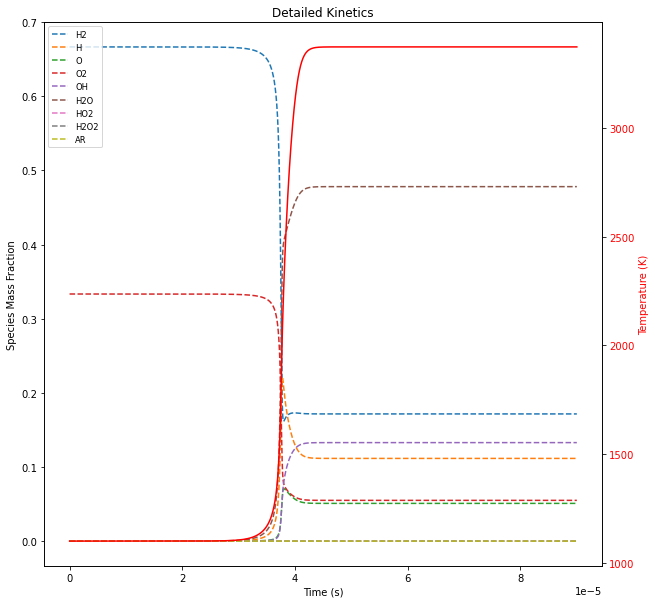

In [96]:
# Plot Results
fig,ax1=plt.subplots(figsize=(10,10))
for i in range (3,reactorNetwork.n_vars):
    ax1.plot(time, X[:,i-3],'--',label=reactorNetwork.component_name(i).split()[1])
ax1.tick_params(axis='y', labelcolor='k')

ax2=ax1.twinx()
ax2.plot(time,Temp,'r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Species Mass Fraction", color='k')
ax2.set_ylabel("Temperature (K)", color='r')
ax1.legend(loc="upper left", fontsize="small")
plt.title("Detailed Kinetics")
plt.show()

In [97]:
def ignition_temp(initial_temp):
    #0D Simulation
    gas_0D = ct.Solution('h2o2.cti')
    fuel_species="H2"
    ox_species="O2"
    phi=1
    gas_0D.set_equivalence_ratio(phi,fuel_species,ox_species)
    gas_0D.TP=initial_temp, 101325
    r = ct.IdealGasReactor(contents=gas_0D)
    reactorNetwork=ct.ReactorNet([r])
    t=0.0
    est_time=0.001
    counter=1
    time=[]
    state=[]

    while(t < est_time):
        t = reactorNetwork.step()
        if (counter%10 == 0):
            time.append(t)
            state.append(reactorNetwork.get_state())
        counter+=1
    #print("Number of iterations:" + str(counter))
    time=np.array(time)
    state=np.array(state)
    final_temp=reactorNetwork.get_state()[2]
    return final_temp

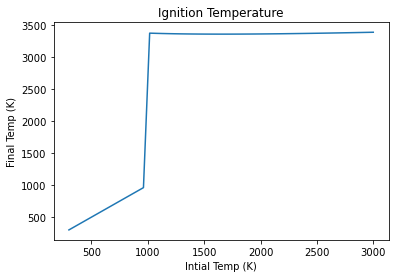

In [98]:
temps=np.linspace(300,3000)
temp_f=[]
for i in temps:
    temp_f.append(ignition_temp(i))
    #print("Initial Temp:",i,"Final Temp: ", temp_f[-1])
temp_f=np.array(temp_f)

plt.plot(temps,temp_f)
plt.title("Ignition Temperature")
plt.xlabel("Intial Temp (K)")
plt.ylabel("Final Temp (K)")
plt.show()

In [100]:
# Calculate Flame Speed
gas.TPX=300, 101325,"H2:2, O2:1"
f=ct.FreeFlame(gas)
f.solve()
f.show_solution()


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.328e-06      7.342
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.208e-05       5.86
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 1 2 3 
    to resolve H H2 H2O H2O2 HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      3.56e-06      7.365
Attempt Newton solution of steady-state problem...    failure

# Accelerating Python

In [ ]:
import numpy as np
import time

## The POWER of Numpy

In [ ]:
#with lists
n=1000000
print("Using", n, "integers")
tic=time.time()
a=[x for x in range(1,n+1)]
b=[x for x in range(1,n+1)]
c=[]
for i in range(len(a)):
    c.append(a[i]+b[i])
sum_c=0.0
for i in range(len(c)):
    sum_c+=c[i]
print(sum_c)
toc=time.time()
print("Without Numpy Total Time: ", toc-tic,"s")

#With Numpy
tic=time.time()
np_a=np.linspace(0,n,n+1)
np_b=np.linspace(0,n,n+1)
np_c=np_a+np_b
npsum_c=np.sum(np_c)
print(npsum_c)
toc=time.time()
print("With Numpy Total Time: ", toc-tic,"s")


## Multiprocessing

In [ ]:
import multiprocessing

In [ ]:
def find_primes(proc,low,high):
    #print("Process:", proc, "Range:",low,"-",high)
    for num in range(low,high+1):
        if num>1:
            for i in range(2,num):
                if (num%i==0):
                    break
            #else:
                #print(num)
            
    

In [ ]:
if __name__ == "__main__":
    
    start=time.time()
    
    n_processes=4
    num_range=[0,100000]
    interval=(num_range[1]-num_range[0])/n_processes
    interval=int(interval)
    #print(interval)
    
    jobs=[]
    
    for i in range(n_processes):
        
        low=i*interval
        high=(i+1)*interval-1
        proc=i
        print("Process:", proc, "Range:",low,"-",high)
        p=multiprocessing.Process(target=find_primes, args=(proc,low,high))
        jobs.append(p)
        p.start()
    
    for job in jobs:
        job.join()
    
    end=time.time()
    print("Found Primes in", end-start, "seconds")
    

## Other topics for parallelism

- Generally 1 process per physical processor
- Queueing to optimize large loads
- concurrent.futures

# Extra Challenge

Use Cantera and multiprocessing to compute the auto-ignition temperatures of different phi

In [ ]:
temps=np.linspace(293,2000,2000)
phi=np.linspace(0.5,1.5,100)

#Hints: you can use the ignition_temp() function.

#gas = ct.Solution('h2o2.cti')
#fuel_species="H2"
#ox_species="O2"
#phi=1
#gas.set_equivalence_ratio(phi,fuel_species,ox_species)
#gas.TP=1100, 101325

In [ ]:
if __name__ == "__main__":
    
    start=time.time()
    jobs=[]
    
    ###Code Here###
    p=multiprocessing.Process(target=, args=(,))
        jobs.append(p)
        p.start()
    
    for job in jobs:
        job.join()
    
    
    end=time.time()
    print("Total Time:", end-start, "seconds")